In [2]:
import geopandas as gpd 
import pandas as pd 
import pysal as ps
buffalo = gpd.read_file("buffalo_SF/buffalo.shp")

In [259]:
import numpy as np 
w = ps.lib.weights.Queen.from_dataframe(buffalo, idVariable='unique')
#wk = ps.lib.weights.higher_order(w,2) # higher order has more randomness!! 

In [258]:
aa_df = pd.read_csv('aa_population_2013_to_2018.csv')
tax_df = pd.read_csv('tax_assesment_change(2013-2018).csv')
tax_df['unique'] = tax_df['unique'].astype(str).apply(lambda x: x.zfill(7))
aa_df['unique'] = aa_df['unique'].astype(str).apply(lambda x: x.zfill(7))
df = pd.merge(aa_df,tax_df,on= 'unique')
df = pd.merge(df,buffalo,on='unique')
df

,unique,aa2013,aa2018,> 10% decrease,> 10% increase,Tax Assesment 2013,Tax Assesment 2018,> 3% decrease,> 3% increase,STATEFP,...,Block,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,0043003,931,546,True,False,41176.386238,40629.946369,False,False,36,...,3,360290043003,Block Group 3,G5030,S,151004,0,+42.9454271,-078.8102959,"POLYGON ((-78.81367 42.94668, -78.81085 42.946..."
1,0043004,237,367,False,True,110367.231217,111961.405361,False,False,36,...,4,360290043004,Block Group 4,G5030,S,275457,0,+42.9462308,-078.8010829,"POLYGON ((-78.80343 42.94937, -78.80341 42.949..."
2,0043005,973,865,True,False,49639.909467,50439.813633,False,False,36,...,5,360290043005,Block Group 5,G5030,S,139348,0,+42.9477918,-078.8103016,"POLYGON ((-78.81370 42.94897, -78.81350 42.948..."
3,0043006,650,520,True,False,43316.619764,42436.905937,False,False,36,...,6,360290043006,Block Group 6,G5030,S,213204,0,+42.9401102,-078.8106721,"POLYGON ((-78.81366 42.94191, -78.81287 42.941..."
4,0043007,242,675,False,True,39269.544978,39290.611645,False,False,36,...,7,360290043007,Block Group 7,G5030,S,109032,0,+42.9432112,-078.8052273,"POLYGON ((-78.80689 42.94495, -78.80340 42.944..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0171001,287,167,True,False,35962.883577,36882.583557,False,False,36,...,1,360290171001,Block Group 1,G5030,S,863860,379440,+42.9260932,-078.9031762,"POLYGON ((-78.90930 42.93839, -78.90749 42.935..."
283,0171002,617,278,True,False,30358.742444,30583.452669,False,False,36,...,2,360290171002,Block Group 2,G5030,S,143281,0,+42.9265922,-078.8904598,"POLYGON ((-78.89448 42.92649, -78.89443 42.926..."
284,0171003,227,391,False,True,36329.715547,37763.441323,False,True,36,...,3,360290171003,Block Group 3,G5030,S,128692,0,+42.9238879,-078.8897782,"POLYGON ((-78.89222 42.92491, -78.89210 42.925..."
285,0171004,244,113,True,False,27270.590569,27152.155100,False,False,36,...,4,360290171004,Block Group 4,G5030,S,128518,0,+42.9233678,-078.8933399,"POLYGON ((-78.89507 42.92198, -78.89503 42.922..."


In [260]:
w.transform = 'r'
#wk.transform = 'r'

In [164]:
tax2013lag = np.log(ps.lib.weights.lag_spatial(wk,df['Tax Assesment 2013']))

tax2013lag[~np.isfinite(x)] = 0
tax2018 = np.log(df['Tax Assesment 2018'])
tax2018[~np.isfinite(x)] = 0 
#tax2018 = np.delete(np.log(df['Tax Assesment 2018']),[21,83],axis = 0)
#b,a = np.polyfit(aa2018,aa2013lag,1)

In [71]:
b

0.3521168110107393

In [129]:
b

0.22289835978987546

<function matplotlib.pyplot.show(*args, **kw)>

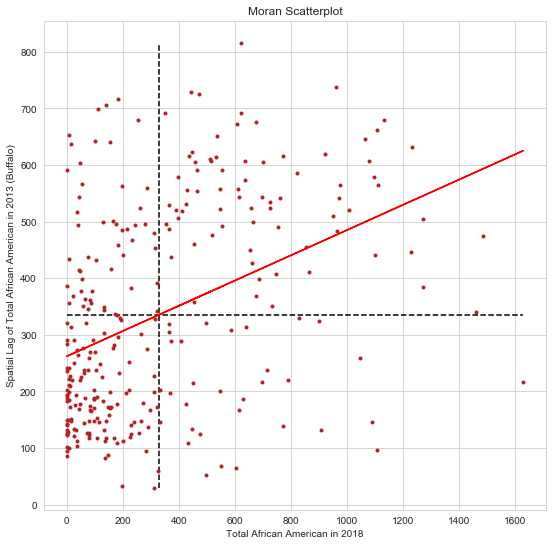

In [130]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize = (9,9))

plt.plot(aa2018,aa2013lag,'.',color = 'firebrick')
plt.vlines(aa2018.mean(),aa2013lag.min(),aa2013lag.max(),linestyle ='--')
plt.hlines(aa2013lag.mean(),aa2018.min(),aa2018.max(),linestyle='--')
plt.plot(aa2018,a+b*aa2018,"r")
plt.title("Moran Scatterplot")
plt.ylabel("Spatial Lag of Total African American in 2013 (Buffalo)")
plt.xlabel("Total African American in 2018")
plt.show
#plt.savefig("MORANS_SCATTERPLOT_tax_assesment2.png")

In [165]:
data_with_lag = pd.DataFrame([tax2018,tax2013lag],index = ['Tax 2018','Spatial Lag Tax 2013']).T

#data_with_nolag['Tax Assesment 2018'] = data_with_nolag['Tax Assesment 2018']

In [166]:
data_with_lag

,Tax 2018,Spatial Lag Tax 2013
0,10.612261,11.136879
1,11.625909,11.222644
2,10.828536,11.548299
3,10.655774,11.108108
4,10.578741,11.133640
...,...,...
282,10.515495,10.422936
283,10.328214,10.564202
284,10.539097,10.666523
285,10.209212,10.482396


In [158]:
data_with_nolag

,Total African American 2018,Tax 2013
0,546.0,10.625620
1,367.0,11.611569
2,865.0,10.812550
3,520.0,10.676292
4,675.0,10.578205
...,...,...
282,167.0,10.490243
283,278.0,10.320840
284,391.0,10.500391
285,113.0,10.213564


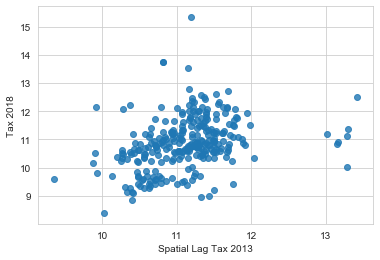

In [167]:
import seaborn as sns 
sns.set_style('whitegrid') 
plot  = sns.regplot(x ='Spatial Lag Tax 2013', y ='Tax 2018',data= data_with_lag) 
#plot.savefig('lagVSTAX.png')

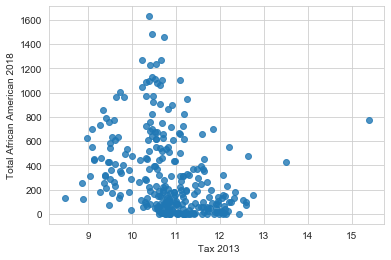

In [163]:
import seaborn as sns 
sns.set_style('whitegrid') 
plot  = sns.regplot(x =' Tax 2013', y ='Total African American 2018',data= data_with_nolag) 
#plot.savefig('lagVSTAX.png')

In [42]:

from sklearn import preprocessing

x = np.log10(data.values) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_standardized = pd.DataFrame(x_scaled,columns = ['Tax Assesment 2018','Spatial Lag Tax Assesment 2013'])

In [43]:
df_standardized

,Tax Assesment 2018,Spatial Lag Tax Assesment 2013
0,0.008756,0.063308
1,0.024128,0.026355
2,0.010870,0.038161
3,0.009145,0.051478
4,0.008467,0.043138
...,...,...
282,0.007948,0.017974
283,0.006591,0.019472
284,0.008138,0.020720
285,0.005851,0.014891


In [52]:
transformed_data =  pd.DataFrame(np.log10(data.values),columns = ['Tax Assesment 2018','Spatial Lag Tax Assesment 2013'])

In [53]:
transformed_data

,Tax Assesment 2018,Spatial Lag Tax Assesment 2013
0,4.608846,4.949451
1,5.049068,4.625954
2,4.702773,4.757379
3,4.627744,4.869503
4,4.594289,4.802735
...,...,...
282,4.566821,4.500502
283,4.485487,4.525753
284,4.577072,4.545714
285,4.433804,4.443401


In [67]:
transformed_data.where(np.inf,np.inf)

ValueError: Array conditional must be same shape as self

In [72]:
transformed_data.iloc[83]

Tax Assesment 2018                    -inf
Spatial Lag Tax Assesment 2013    4.705986
Name: 83, dtype: float64

In [74]:
new_transformed_data = transformed_data.drop([21,83])

In [1]:
new_transformed_data

NameError: name 'new_transformed_data' is not defined

In [261]:
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv
import scipy.stats as ss
x = df['aa2018'].values
y = df['Tax Assesment 2013'].values


In [262]:
df['Tax Assesment 2013']

0       41176.386238
1      110367.231217
2       49639.909467
3       43316.619764
4       39269.544978
           ...      
282     35962.883577
283     30358.742444
284     36329.715547
285     27270.590569
286     32328.567246
Name: Tax Assesment 2013, Length: 287, dtype: float64

In [267]:
moran_bv = Moran_BV(x, y, w)
moran_loc_bv = Moran_Local_BV(x, y, w)

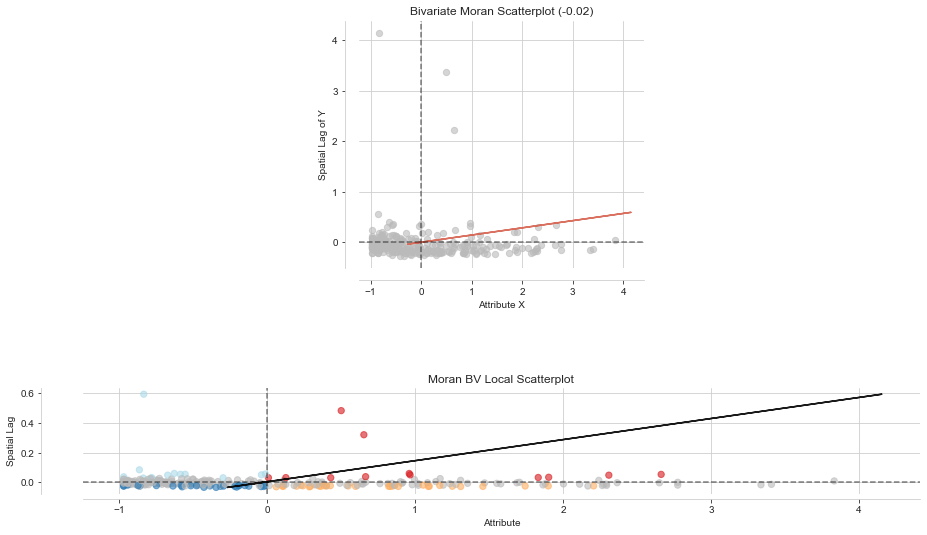

In [268]:
from splot.esda import moran_scatterplot
fig, axs = plt.subplots(2, 1, figsize=(15,10),
                        subplot_kw={'aspect': 'equal'})

#moran_scatterplot(moran, ax=axs[0,0])
#moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1])
plt.show()

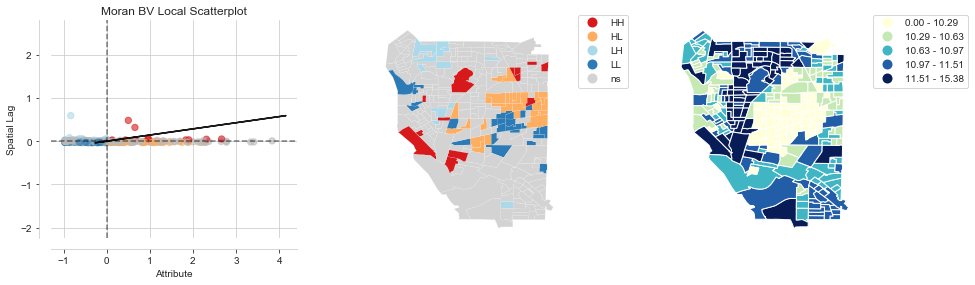

In [269]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc_bv, gdf, 'Tax Assesment 2013')
plt.show()

In [266]:
moran_bv.I

-0.01481228076050959

In [136]:
moran_bv.I

-0.09879370488330504

In [281]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf

,unique,aa2013,aa2018,> 10% decrease,> 10% increase,Tax Assesment 2013,Tax Assesment 2018,> 3% decrease,> 3% increase,STATEFP,...,Block,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,0043003,931,546,True,False,41176.386238,40629.946369,False,False,36,...,3,360290043003,Block Group 3,G5030,S,151004,0,+42.9454271,-078.8102959,"POLYGON ((-78.81367 42.94668, -78.81085 42.946..."
1,0043004,237,367,False,True,110367.231217,111961.405361,False,False,36,...,4,360290043004,Block Group 4,G5030,S,275457,0,+42.9462308,-078.8010829,"POLYGON ((-78.80343 42.94937, -78.80341 42.949..."
2,0043005,973,865,True,False,49639.909467,50439.813633,False,False,36,...,5,360290043005,Block Group 5,G5030,S,139348,0,+42.9477918,-078.8103016,"POLYGON ((-78.81370 42.94897, -78.81350 42.948..."
3,0043006,650,520,True,False,43316.619764,42436.905937,False,False,36,...,6,360290043006,Block Group 6,G5030,S,213204,0,+42.9401102,-078.8106721,"POLYGON ((-78.81366 42.94191, -78.81287 42.941..."
4,0043007,242,675,False,True,39269.544978,39290.611645,False,False,36,...,7,360290043007,Block Group 7,G5030,S,109032,0,+42.9432112,-078.8052273,"POLYGON ((-78.80689 42.94495, -78.80340 42.944..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0171001,287,167,True,False,35962.883577,36882.583557,False,False,36,...,1,360290171001,Block Group 1,G5030,S,863860,379440,+42.9260932,-078.9031762,"POLYGON ((-78.90930 42.93839, -78.90749 42.935..."
283,0171002,617,278,True,False,30358.742444,30583.452669,False,False,36,...,2,360290171002,Block Group 2,G5030,S,143281,0,+42.9265922,-078.8904598,"POLYGON ((-78.89448 42.92649, -78.89443 42.926..."
284,0171003,227,391,False,True,36329.715547,37763.441323,False,True,36,...,3,360290171003,Block Group 3,G5030,S,128692,0,+42.9238879,-078.8897782,"POLYGON ((-78.89222 42.92491, -78.89210 42.925..."
285,0171004,244,113,True,False,27270.590569,27152.155100,False,False,36,...,4,360290171004,Block Group 4,G5030,S,128518,0,+42.9233678,-078.8933399,"POLYGON ((-78.89507 42.92198, -78.89503 42.922..."


C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\mapclassify\classifiers.py:239: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)
C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\mapclassify\classifiers.py:239: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)
No handles with labels found to put in legend.


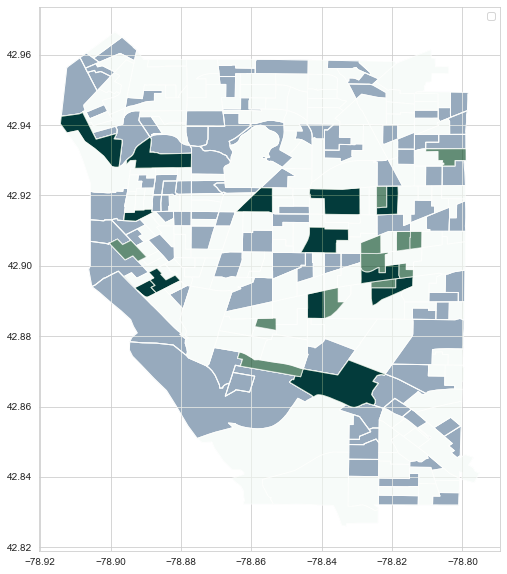

In [282]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
gdf.plot(column = '> 3% decrease',ax = ax ,cmap='Greens', scheme='quantiles',zorder=1,alpha=0.6) # red is increase tax
gdf.plot(column = '> 10% increase',ax = ax , cmap= 'Blues',scheme='quantiles',zorder=0) # 10 decrease in african american  
ax.legend()
plt.savefig('increaseAA_decreaseTAX.png')

In [283]:
gdf['difference tax'] = gdf['Tax Assesment 2018'] - gdf['Tax Assesment 2013']
gdf['difference in African Americans'] = gdf['aa2018'] - gdf['aa2013']

In [284]:
gdf

,unique,aa2013,aa2018,> 10% decrease,> 10% increase,Tax Assesment 2013,Tax Assesment 2018,> 3% decrease,> 3% increase,STATEFP,...,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,difference tax,difference in African Americans
0,0043003,931,546,True,False,41176.386238,40629.946369,False,False,36,...,Block Group 3,G5030,S,151004,0,+42.9454271,-078.8102959,"POLYGON ((-78.81367 42.94668, -78.81085 42.946...",-546.439869,-385
1,0043004,237,367,False,True,110367.231217,111961.405361,False,False,36,...,Block Group 4,G5030,S,275457,0,+42.9462308,-078.8010829,"POLYGON ((-78.80343 42.94937, -78.80341 42.949...",1594.174144,130
2,0043005,973,865,True,False,49639.909467,50439.813633,False,False,36,...,Block Group 5,G5030,S,139348,0,+42.9477918,-078.8103016,"POLYGON ((-78.81370 42.94897, -78.81350 42.948...",799.904167,-108
3,0043006,650,520,True,False,43316.619764,42436.905937,False,False,36,...,Block Group 6,G5030,S,213204,0,+42.9401102,-078.8106721,"POLYGON ((-78.81366 42.94191, -78.81287 42.941...",-879.713826,-130
4,0043007,242,675,False,True,39269.544978,39290.611645,False,False,36,...,Block Group 7,G5030,S,109032,0,+42.9432112,-078.8052273,"POLYGON ((-78.80689 42.94495, -78.80340 42.944...",21.066667,433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0171001,287,167,True,False,35962.883577,36882.583557,False,False,36,...,Block Group 1,G5030,S,863860,379440,+42.9260932,-078.9031762,"POLYGON ((-78.90930 42.93839, -78.90749 42.935...",919.699980,-120
283,0171002,617,278,True,False,30358.742444,30583.452669,False,False,36,...,Block Group 2,G5030,S,143281,0,+42.9265922,-078.8904598,"POLYGON ((-78.89448 42.92649, -78.89443 42.926...",224.710225,-339
284,0171003,227,391,False,True,36329.715547,37763.441323,False,True,36,...,Block Group 3,G5030,S,128692,0,+42.9238879,-078.8897782,"POLYGON ((-78.89222 42.92491, -78.89210 42.925...",1433.725776,164
285,0171004,244,113,True,False,27270.590569,27152.155100,False,False,36,...,Block Group 4,G5030,S,128518,0,+42.9233678,-078.8933399,"POLYGON ((-78.89507 42.92198, -78.89503 42.922...",-118.435470,-131


No handles with labels found to put in legend.


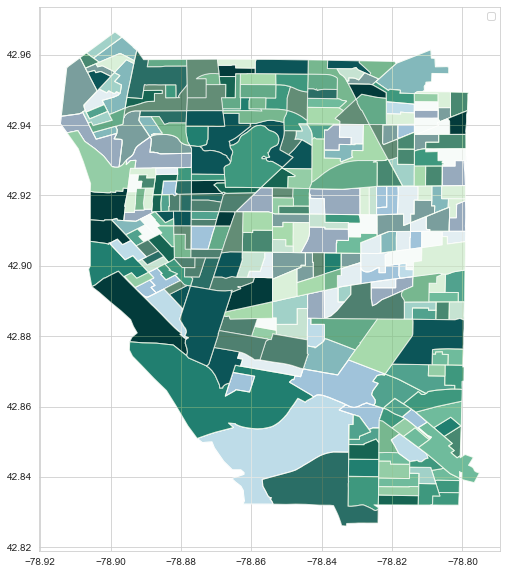

In [285]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
gdf.plot(column = 'difference tax',ax = ax ,cmap='Greens', scheme='quantiles',zorder=1,alpha=0.6,legend= True) # red is increase tax
gdf.plot(column = 'difference in African Americans',ax = ax , cmap= 'Blues',scheme='quantiles',zorder=0) # 10 decrease in african american  
ax.legend()
#plt.savefig('increaseAA_decreaseTAX.png')

In [278]:
np.where(gdf['difference tax'] >1)

(array([132, 210], dtype=int64),)

In [280]:
gdf['difference tax'].iloc[132]

1.102906452837944